In [74]:
!pip install pint
!pip install scipy
!pip install numpy
!pip install sympy
!pip install pandas
!pip install matplotlib

In [75]:
from scipy import constants
import pint
import numpy as np
import sympy as sp
import pandas as pd
import matplotlib.pyplot as plt

ureg = pint.UnitRegistry()

# Exercises

In [76]:
# 14.1
# (a)
f = 466 * ureg.Hz
T = 1 / f
ω = 2 * np.pi * f
print(f"T = {T.to(ureg.s):.3g}")
print(f"ω = {ω.to(ureg.rad/ureg.s):.3g}")
# (b)
T = 50.0 * ureg.microsecond
f = 1 / T
ω = 2 * np.pi * f
print(f"f = {f.to(ureg.Hz):.3g}")
print(f"ω = {ω.to(ureg.rad/ureg.s):.3g}")
# (c)(d)
# Pass.

T = 0.00215 second
ω = 2.93e+03 radian / second
f = 2e+04 hertz
ω = 1.26e+05 radian / second


In [77]:
# 14.3
f = 440 / 0.500 * ureg.Hz

T = 1 / f
ω = 2 * np.pi * f
print(f"T = {T.to(ureg.ms):.3g}")
print(f"ω = {ω.to(ureg.rad/ureg.s):.3g}")

T = 1.14 millisecond
ω = 5.53e+03 radian / second


In [78]:
# 14.5
f = 5.10 * ureg.Hz
T = 1 / f
print(f"{1/4 * T.to(ureg.s):.3g}.")

0.049 second.


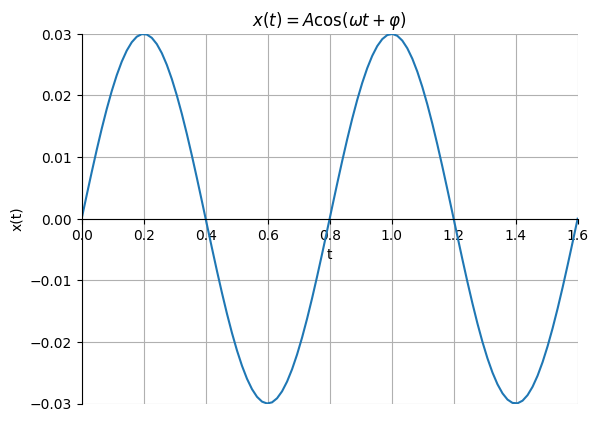

In [79]:
# 14.7

import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

# 定义符号变量
t, A, ω, φ = sp.symbols("t A ω φ", real=True)
x = A * sp.cos(ω * t + φ)

# 已知参数
known = {A: 3.0*10**(-2), ω: 2*sp.pi/0.80, φ: -sp.pi/2}

# 将符号表达式转换为可用于计算的函数
x_func = sp.lambdify(t, x.subs(known), modules=["numpy"])

# 生成时间数据
t_values = np.linspace(0, 1.60, 100)

# 计算 x 的值
x_values = x_func(t_values)

# 绘图
fig, ax = plt.subplots()

ax.plot(t_values, x_values)
ax.set_title(r"$x(t) = A \cos(\omega t + \varphi)$")
ax.set_xlabel("t")
ax.set_ylabel("x(t)")
ax.grid(True)

# 设置x轴范围与t一致
ax.set_xlim([t_values.min(), t_values.max()])

# 设置y轴范围与A一致
A_value = known[A]
ax.set_ylim([-A_value, A_value])

# 仅移动x轴到图形的中央
ax.spines['bottom'].set_position('zero')  # 将底部框移到y=0的位置
ax.spines['top'].set_color('none')        # 隐藏顶部框

# 保持y轴在左侧
ax.spines['left'].set_position('zero')
ax.spines['right'].set_color('none')      # 隐藏右边框

# 调整刻度线的位置
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

plt.show()


In [80]:
# 14.9
k = 128 * ureg.N / ureg.m
f = 6.20 * ureg.Hz

T = 1 / f
ω = 2 * np.pi / T
m = k / ω**2
print(f"(a) T = {T.to(ureg.s):.3g}")
print(f"(b) ω = {ω.to(ureg.rad/ureg.s):.3g}")
print(f"(c) m = {m.to(ureg.kg):.3g}")

(a) T = 0.161 second
(b) ω = 39 radian / second
(c) m = 0.0843 kilogram


In [81]:
# 14.11
T = 0.820
ω = 2 * sp.pi / T
A = 0.320
x, t = sp.symbols('x t', real=True)
x = A * sp.cos(ω * t)

eq_1 = sp.Eq(x, 0.160)
sol = sp.solve(eq_1, t)
print(f"(a) {sol[0]:.3g} s.")

print(f"(b) {1/4 * T - sol[0]:.3g} s.")

(a) 0.137 s.
(b) 0.0683 s.


In [82]:
# 14.13
k = 300
m = 2.00
ω = sp.sqrt(k / m)
T = 1 / ω
φ = sp.pi / 2
v = 12.0
A = sp.sqrt(m * v**2 / k)

x, t = sp.symbols('x t', real=True)
# x = A * sp.cos(ω * t + φ)

print(f"(a) A = {A.evalf(3)} m.")
print(f"(b) φ = {φ} rad.")
display(sp.Eq(x, A * sp.cos(ω * t + φ)))

(a) A = 0.980 m.
(b) φ = pi/2 rad.


Eq(x, -0.979795897113271*sin(12.2474487139159*t))

In [83]:
# 14.15
# 草稿纸做。

In [84]:
# 14.17 BIO Weighing Astronauts.
k, m = sp.symbols('k m ', positive=True)
eq_1 = sp.Eq(1.30, 2 * sp.pi / sp.sqrt(k / 42.5))
eq_2 = sp.Eq(2.54, 2 * sp.pi / sp.sqrt(k / m))
sol = sp.solve([eq_1, eq_2], [k, m])
sol[0][1].evalf(3) - 42.5

119.750000000000

In [85]:
# 14.19
T = 0.20
ω = 2 * sp.pi / T
k = (2.30 * ureg.N / ureg.centimeter).to_base_units().magnitude
m = k / ω**2
print(f"(a) m = {m.evalf(3)} kg.")

A = 12.0 / ω**2
print(f"(b) A = {A.evalf(3)} m.")

F = m * 12.0
print(f"(c) F = {F.evalf(3)} N.")

(a) m = 0.233 kg.
(b) A = 0.0122 m.
(c) F = 2.80 N.


In [86]:
# 14.21
x, t = sp.symbols('x t', real=True)
A, ω, k, m, T, f, φ = sp.symbols('A ω k m T f φ')

known = {A:7.40*10**(-2), ω:4.16, φ:-2.42, m:2.20}
x = A * sp.cos(ω * t + φ)
v = x.diff(t)
a = v.diff(t)

T = 2 * sp.pi / ω
print(f"(a) T = {T.subs(known).evalf(3)} s.")

k = m * ω**2
print(f"(b) k = {k.subs(known).evalf(3)} N/m.")

print(f"(c) v_max = {(A * ω).subs(known).evalf(3)} m/s.")

print(f"(d) F_max = {(m * A * ω**2).subs(known).evalf(3)} N.")

print(f"(e) x = {x.subs(known).subs(t,1).evalf(3)} m, v = {v.subs(known).subs(t,1).evalf(3)} m/s, a = {a.subs(known).subs(t,1).evalf(3)} m/s^2.")

print(f"(f) F = {(m * a).subs(known).subs(t,1).evalf(3)} N.")

(a) T = 1.51 s.
(b) k = 38.1 N/m.
(c) v_max = 0.308 m/s.
(d) F_max = 2.82 N.
(e) x = -0.0125 m, v = -0.303 m/s, a = 0.216 m/s^2.
(f) F = 0.474 N.


In [87]:
# 14.23 CALC
x, t = sp.symbols('x t', real=True)
A, ω, k, m, T, f = sp.symbols('A ω k m T f', positive=True)
φ = sp.symbols('φ', real=True)

x = A * sp.cos(ω * t + φ).subs(φ, 0)
v = x.diff(t)
a = v.diff(t)
j = a.diff(t)

display(j)
print()

display((2 * sp.pi / 5).nsimplify())

A*ω**3*sin(t*ω)

2*pi/5

In [88]:
# 14.25
A = 0.165 * ureg.m
v_max = 3.90 * ureg.m / ureg.s
ω = v_max / A
a_max = A * ω**2
print(f"{a_max:.3g}.")

92.2 meter / second ** 2.


In [89]:
# 14.27
t = sp.symbols('t', real=True)
A, ω, k, m, T, f = sp.symbols('A ω k m T f', positive=True)
φ = sp.symbols('φ', real=True)

known = {φ: 0, k: 305, m: 0.155}
x = A * sp.cos(ω * t + φ)
v = x.diff(t)
a = v.diff(t)
E = 1/2 * k * (1.25*10**(-2))**2 + 1/2 * m * (-0.295)**2
print(f"(a) {E.subs(known).evalf(3)} J.")

eq_1 = sp.Eq(x, 1.25*10**(-2))
eq_2 = sp.Eq(v, -0.295)
eq_3 = sp.Eq(ω, sp.sqrt(k / m))
sol = sp.solve([eq_1, eq_2, eq_3], [A, ω, t])
# display(sol)
print(f"(b) A = {sol[0][0].subs(known).evalf(3)} m.")
print(f"(c) v_max = {(sol[0][0]*sol[0][1]).subs(known).evalf(3)} m/s.")

(a) 0.0306 J.
(b) A = 0.0142 m.
(c) v_max = 0.628 m/s.


In [90]:
# 14.29
x, v, a, j, t = sp.symbols('x v a j t', real=True)
A, ω, k, m, T, f = sp.symbols('A ω k m T f', positive=True)
θ, φ = sp.symbols('θ φ', real=True)

known = {m:0.500, k:450, A:0.040, x:-0.015}

v_max = (A * sp.sqrt(k / m)).subs(known)
print(f"(a) v_max = {v_max.evalf(3)} m/s.")

equations = [
    sp.Eq(x, A * sp.cos(θ)),
    sp.Eq(v, - A * ω * sp.sin(θ)),
    sp.Eq(ω, sp.sqrt(k / m))
]
sol = sp.solve(equations, [v, θ, ω])
speed = sp.Abs(sol[0][0].subs(known))
print(f"(b) speed = {speed.evalf(3)} m/s when x = -0.015 m.")

a_max = (A * sp.sqrt(k / m)**2).subs(known)
print(f"(c) a_max = {a_max.evalf(3)} m/s^2.")

equations = [
    sp.Eq(x, A * sp.cos(θ)),
    sp.Eq(a, - A * ω**2 * sp.cos(θ)),
    sp.Eq(ω, sp.sqrt(k / m))
]
sol = sp.solve(equations, [a, θ, ω])
a = sp.Abs(sol[0][0].subs(known))
print(f"(d) a = {a.evalf(3)} m/s^2 when x = -0.015 m.")

E = (1/2 * m * v_max**2).subs(known)
print(f"(e) E = {E.evalf(3)} J.")

(a) v_max = 1.20 m/s.
(b) speed = 1.11 m/s when x = -0.015 m.
(c) a_max = 36.0 m/s^2.
(d) a = 13.5 m/s^2 when x = -0.015 m.
(e) E = 0.360 J.


In [91]:
# 14.31
# Pass.

In [92]:
# 14.33
x = 0.600
v = 2.20
a = - 8.40
print(f"{(x**2 - x/a * v**2)**(1/2) - x:.3g} m.")

0.24 m.


In [93]:
# 14.35
x, v, a, j, t = sp.symbols('x v a j t', real=True)
A, ω, k, m, T, f = sp.symbols('A ω k m T f', positive=True)
θ, φ = sp.symbols('θ φ', real=True)

known = {m:2.00, k:315, x:0.200, v:-4.00}

equations = [
    sp.Eq(1/2 * k * A**2, 1/2 * k * x**2 + 1/2 * m * v**2)
]
sol_A = sp.solve(equations, [A])
A = sol_A[0][0].subs(known)
print(f"(a) A = {A.evalf(3)} m.")

ω = sp.sqrt(k / m).subs(known)
a_max = A * ω**2
print(f"(b) v_max = {a_max.evalf(3)} m/s.")

F_max = (m * a_max).subs(known)
print(f"(c) F_max = {F_max.evalf(3)} N.")

(a) A = 0.376 m.
(b) v_max = 59.3 m/s.
(c) F_max = 119 N.


In [94]:
# 14.37
x, v, a, j, t = sp.symbols('x v a j t', real=True)
A, ω, k, m, T, f = sp.symbols('A ω k m T f', positive=True)
θ, φ = sp.symbols('θ φ', real=True)

# known = {x:x, v:v, a:a, j:j, t:t, A:A, ω:ω, k:k, m:m, T:T, f:f, θ:θ, φ:φ}
known = {x:2.50*10**(-2), v:0.765, a:a, j:j, t:t, A:A, ω:ω, k:180, m:0.180, T:T, f:f, θ:θ, φ:φ}

equations = [
    sp.Eq(1/2 * k * A**2, 1/2 * k * x**2 + 1/2 * m * v**2)
]
sol = sp.solve(equations, [A])
known[A] = float(sol[0][0].subs(known))
print(f"(a) A = {known[A]:.3g} m.")

v_max = (A * sp.sqrt(k / m)).subs(known)
print(f"(b) v_max = {v_max.evalf(3)} m/s.")

known[ω] = float(sp.sqrt(k / m).subs(known))
print(f"(c) ω = {known[ω]:.3g} rad/s.")

(a) A = 0.0348 m.
(b) v_max = 1.10 m/s.
(c) ω = 31.6 rad/s.


In [95]:
# 14.39
x, v, a, j, t = sp.symbols('x v a j t', real=True)
A, ω, k, m, T, f = sp.symbols('A ω k m T f', positive=True)
θ, φ = sp.symbols('θ φ', real=True)

# known = {x:x, v:v, a:a, j:j, t:t, A:A, ω:ω, k:k, m:m, T:T, f:f, θ:θ, φ:φ}
known = {x:x, v:v, a:a, j:j, t:t, A:0.050, ω:ω, k:k, m:4.00, T:T, f:f, θ:θ, φ:φ}

# a_max = A * ω**2 = constants.g
equations = [
    sp.Eq(A * ω**2, constants.g)
]
sol = sp.solve(equations, [ω])
known[ω] = sol[0][0].subs(known)

known[k] = (m * ω**2).subs(known)
v_max = (A * ω).subs(known)

K_max = (1/2 * m * v_max**2).subs(known)
U_grav_max = (m * constants.g * 2 * A).subs(known)

print(f"(a) {0} J, {0} J, {U_grav_max.evalf(3)} J.") # 最高点
print(f"(b) {(1/2 * k * (2 * A)**2).subs(known).evalf(3)} J, {0} J, {0} J.") # 最低点
print(f"(c) {(1/2 * k * A**2).subs(known).evalf(3)} J, {K_max.evalf(3)} J, {(1/2 * U_grav_max).evalf(3)} J.") # 平衡点

(a) 0 J, 0 J, 3.92 J.
(b) 3.92 J, 0 J, 0 J.
(c) 0.981 J, 0.981 J, 1.96 J.


In [96]:
# 14.41
x, v, a, j, t = sp.symbols('x v a j t', real=True)
A, ω, k, m, T, f = sp.symbols('A ω k m T f', positive=True)
θ, φ = sp.symbols('θ φ', real=True)
κ, I = sp.symbols('κ I', positive=True)
# known = {x:x, v:v, a:a, j:j, t:t, A:A, ω:ω, k:k, m:m, T:T, f:f, θ:θ, φ:φ, κ:κ, I:I}

known = {x:x, v:v, a:a, j:j, t:t, A:A, ω:ω, k:k, m:1.0*10**(-3), T:T, f:2, θ:θ, φ:φ, κ:κ, I:I}
r = 0.54 * 10**(-2)

known[ω] = (2 * sp.pi * f).subs(known)
known[I] = (m * r**2).subs(known)
known[κ] = (I * ω**2).subs(known)

print(f"(a) {known[I].evalf(3)} kg.m^2.")
print(f"(b) {known[κ].evalf(3)} N.m/rad.")

(a) 2.92E-8 kg.m^2.
(b) 0.00000460 N.m/rad.


In [97]:
# 14.43
x, v, a, j, t = sp.symbols('x v a j t', real=True)
A, ω, k, m, T, f = sp.symbols('A ω k m T f', positive=True)
θ, φ = sp.symbols('θ φ', real=True)
κ, I = sp.symbols('κ I', positive=True)
# known = {x:x, v:v, a:a, j:j, t:t, A:A, ω:ω, k:k, m:m, T:T, f:f, θ:θ, φ:φ, κ:κ, I:I}

known = {x:x, v:v, a:a, j:j, t:t, A:A, ω:ω, k:k, m:m, T:T, f:f, θ:θ, φ:φ, κ:κ, I:I}

known[k] = m * constants.g / 0.255
known[ω] = sp.sqrt(k / m)

t_val = (sp.pi /2 / known[ω]).subs(known)
print(f"(a)(b) {t_val.evalf(3)} s.")

(a)(b) 0.253 s.


In [98]:
# 14.45
x, v, a, j, t = sp.symbols('x v a j t', real=True)
A, ω, k, m, T, f = sp.symbols('A ω k m T f', positive=True)
θ, φ = sp.symbols('θ φ', real=True)
κ, I = sp.symbols('κ I', positive=True)
# known = {x:x, v:v, a:a, j:j, t:t, A:A, ω:ω, k:k, m:m, T:T, f:f, θ:θ, φ:φ, κ:κ, I:I}

known = {x:x, v:v, a:a, j:j, t:t, A:A, ω:ω, k:k, m:2.35, T:T, f:f, θ:θ, φ:φ, κ:κ, I:I}
L = sp.Float(1.50)

known[k] = m * constants.g / L
known[ω] = sp.sqrt(k / m)
known[f] = known[ω] / (2 * sp.pi)

f_val = known[f].subs(known)
print(f"{f_val.evalf(3)} Hz.")

0.407 Hz.


In [99]:
# 14.47
x, v, a, j, t = sp.symbols('x v a j t', real=True)
A, ω, k, m, T, f = sp.symbols('A ω k m T f', positive=True)
θ, φ = sp.symbols('θ φ', real=True)
κ, I = sp.symbols('κ I', positive=True)
# known = {x:x, v:v, a:a, j:j, t:t, A:A, ω:ω, k:k, m:m, T:T, f:f, θ:θ, φ:φ, κ:κ, I:I}

known = {x:x, v:v, a:a, j:j, t:t, A:A, ω:ω, k:k, m:m, T:T, f:sp.Float(105/135), θ:θ, φ:φ, κ:κ, I:I}
L = sp.Float(0.550)

ω = 2 * sp.pi * f
k = m * ω**2
g_val = (k / m * L).subs(known)
print(f"{g_val.evalf(3)} m/s^2.")

13.1 m/s^2.


In [100]:
# 14.49
# Pass.

In [101]:
# 14.51
x, v, a, j, t = sp.symbols('x v a j t', real=True)
A, ω, k, m, T, f = sp.symbols('A ω k m T f', positive=True)
θ, φ = sp.symbols('θ φ', real=True)
κ, I = sp.symbols('κ I', positive=True)
L, r = sp.symbols('L r', positive=True)
# known = {x:x, v:v, a:a, j:j, t:t, A:A, ω:ω, k:k, m:m, T:T, f:f, θ:θ, φ:φ, κ:κ, I:I, L:L}

# 草稿纸上做,Pass.

In [102]:
# 14.53
# 草稿纸做，定性分析，Pass。

In [103]:
# 14.55
# 定性分析，Pass。

In [104]:
# 14.57
m = 0.300
k = 2.50
b = 0.900

ω = ((k / m) - (b**2 / (4 * m**2)))**(1/2)
f = ω / (2 * np.pi)
print(f"(a) f = {f:.3g} Hz.")

b_crit = 2 * (k * m)**(1/2)
print(f"(b) b_crit = {b_crit:.3g} kg/s.")

(a) f = 0.393 Hz.
(b) b_crit = 1.73 kg/s.


In [105]:
# 14.59
# 跳过不学。

# Problems

In [106]:
# 14.61
# 草稿纸做。
# 12倍和72倍。

In [107]:
# 14.63
x, v, a, j, t = sp.symbols('x v a j t', real=True)
A, ω, k, m, T, f = sp.symbols('A ω k m T f', positive=True)
θ, φ = sp.symbols('θ φ', real=True)

# known = {x:x, v:v, a:a, j:j, t:t, A:A, ω:ω, k:k, m:m, T:T, f:f, θ:θ, φ:φ}
known = {x:x, v:v, a:a, j:j, t:0.475, A:0.590, ω:ω, k:k, m:m, T:1.230, f:f, θ:θ, φ:sp.pi/2}

known[ω] = 2 * sp.pi / known[T]
x = A * sp.cos(ω * t + φ)

print(f"{x.subs(known).evalf(3)} m.")

-0.387 m.


In [108]:
# 14.65
# k_2 = 16 * k_1

In [109]:
# 14.67
print(f"{8.62 / 0.12**2:.3g} N/m.")

599 N/m.


In [110]:
# 14.69
k = 185
m = 290 * 10**(-3)
M = 1.70
A = 16.1 * 10**(-2)
g = 9.8

d = (m + M) * g / k
print(f"(a) {A + d:.3g} m.")

ω = np.sqrt(k / (m + M))
t = sp.symbols('t', positive=True)
x = A * sp.cos(ω * t)
eq = sp.Eq(x, -d)
sol_t = sp.solve(eq, t)
print(f"(b) {sol_t[0]:.3g} s.")

v = x.diff(t)
print(f"(c) {v.subs(t, sol_t[0]).evalf(3)} m/s.")

(a) 0.266 m.
(b) 0.237 s.
(c) -1.17 m/s.


In [111]:
# 14.71
k = 1.50
w = 1.00
g = 9.80
m = w / g

f_1 = 1/ (2 * np.pi) * np.sqrt(k / m)
f_2 = 1/2 * f_1

L = g / (2 * np.pi * f_2)**2
ΔL = w / k
print(f"{L-ΔL:.3g} m.")

2 m.


In [112]:
# 14.73
m, L, g = sp.symbols('m L g', positive=True)
I = (1/3 * m * L**2) * 2 + (1/3 * m * L**2 + m * L**2) * 2
ω = sp.sqrt(4 * m * g * 1/sp.sqrt(2) * L / I)
f = ω / (2 * sp.pi)
display(f)

0.387298334620742*2**(1/4)*sqrt(g)/(pi*sqrt(L))

In [113]:
# 14.75 CALC
t = sp.symbols('t', positive=True)
m_bucket = 2.00
v_leak = 2 * 10**(-3)
m_water = 10 - v_leak * t
k = 450

ω = sp.sqrt(k / (m_bucket + m_water))
T = 2 * sp.pi / ω

print(f"(a) {T.subs(t, 10/2/v_leak).evalf(3)} s.")
print(f"(b) {T.diff(t).subs(t, 10/2/v_leak).evalf(3)} s/s, shoter.")
print(f"(c) {T.subs(t, 10/v_leak).evalf(3)} s.")

(a) 0.784 s.
(b) -0.000112 s/s, shoter.
(c) 0.419 s.


In [128]:
# 14.77
# m = 5.00 * ureg.kg
# T = 4.20 * ureg.s
# A = 0.100 * ureg.m
# ω = 2 * np.pi / T
# v_max = A * ω
# print(f"(a) {v_max.to(ureg.m / ureg.s):.3g}")
# k = m * ω**2
# a = - k / m * (- 0.05 * ureg.m)
# print(f"(b) {a.to(ureg.m / ureg.s**2):.3g}, downward.")

t = sp.symbols('t', positive=True)
x, v, a, j = sp.symbols('x v a j', real=True)
A, ω, k, m, T, f = sp.symbols('A ω k m T f', positive=True)
θ, φ = sp.symbols('θ φ', real=True)
g = sp.symbols('g', positive=True)

known = {m:5.00, A:0.100, T:4.20, φ:sp.pi, g:9.80}
known[ω] = 2 * sp.pi / known[T]
x = A * sp.cos(ω * t + φ)
v = x.diff(t)
a = v.diff(t)

v_max = A * ω
print(f"(a) {v_max.subs(known).evalf(3)} m/s.")

sol_t = sp.solve(sp.Eq(x, 0.05), t)
sol_t = sol_t[1].subs(known).evalf(3)
print(f"(b) {a.subs(known).subs(t, sol_t).evalf(3)} m/s^2, downward.")

sol_t_2 = sp.solve(sp.Eq(x, -0.05), t)
sol_t_2 = sol_t_2[1].subs(known).evalf(3)
print(f"(c) {sol_t - sol_t_2} s.")

known[k] = m * ω**2
d = m * g / k
print(f"(d) {d.subs(known).evalf(3)} m.")

(a) 0.150 m/s.
(b) -0.112 m/s^2, downward.
(c) 0.700 s.
(d) 4.38 m.


In [142]:
# 14.79 CP SHM of a Butcher’s Scale.
k, m_pan, m_steak, h, g = sp.symbols('k m_pan m_steak h g', positive=True)
known = {k:400, m_pan:0.200, m_steak:2.2, h:0.40, g:9.80}

v_1, v_2 = sp.symbols('v_1 v_2', positive=True)
equations = [
    sp.Eq(1/2 * m_steak * v_1**2, m_steak * g * h),
    sp.Eq(m_steak * v_1, (m_pan + m_steak) * v_2)
]
sol = sp.solve(equations, [v_1, v_2])
v_1 = sol[0][0].subs(known)
v_2 = sol[0][1].subs(known)
print(f"(a) {v_2.evalf(3)} m/s.")

M = m_pan + m_steak
# 处于平衡位置时，弹簧向下拉伸的长度设为 d
d = (m_pan + m_steak) * g / k
# 当弹簧处于向下最大拉伸时的长度设为 D
D = sp.symbols('D', positive=True)
equations = [
    sp.Eq(1/2 * k * D**2, M * g * D + 1/2 * M * v_2**2)
]
sol_D = sp.solve(equations, [D])
D = sol_D[1][0].subs(known)
A = D - d.subs(known)
print(f"(b) {A.evalf(3)} m.")

T = 2 * sp.pi * sp.sqrt(M / k)
print(f"(c) {T.subs(known).evalf(3)} s.")

(a) 2.57 m/s.
(b) 0.207 m.
(c) 0.487 s.


In [146]:
# 14.81 Don’t Miss the Boat.
m, A, T = sp.symbols('m A T', positive=True)
known = {m:1500, A:0.2, T:3.5}

t = sp.symbols('t', positive=True)
ω = 2 * sp.pi / known[T]
x = A * sp.cos(ω * t)
sol_t = sp.solve(sp.Eq(x.subs(known), 0.1), t)
print(f"{(sol_t[0] * 2).evalf(3)} s.")

1.17 s.


In [148]:
# 14.83 CP
v_before, m_bullet, m_block, A = sp.symbols('v_before m_bullet m_block A', positive=True)
known = {v_before:280, m_bullet:8.53*10**(-3), m_block:0.992, A:0.18}
M = m_bullet + m_block
v_after = m_bullet * v_before / M
K = 1/2 * M * v_after**2
k = 2 * K / A**2
T = 2 * sp.pi * sp.sqrt(M / k)
print(f"{T.subs(known).evalf(3)} s.")

0.474 s.


In [165]:
# 14.85 CP
m_1, m_2, L, h, g = sp.symbols('m_1 m_2 L h g', positive=True)
known = {m_1:2.00, m_2:3.00, L:0.50, h:0.10, g:9.80}

E = m_1 * g * h
v_before = sp.sqrt(2 * E / m_1)
M = m_1 + m_2
v_after = m_1 * v_before / M
E_after = 1/2 * M * v_after**2
h_after = E_after / (M * g)
θ = sp.acos((L - h_after) / L)
f = 1/(2 * sp.pi) * sp.sqrt(g / L)
print(f"{f.subs(known).evalf(3)} Hz.")
print(f"{sp.deg(θ).subs(known).evalf(3)} deg.")

0.705 Hz.
14.5 deg.


In [166]:
# 14.87 CALC
# 草稿纸上做。Pass。

14.

89 91 93 95 Pass.